In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
#load dataset
df = pd.read_csv("amazon.csv") 
df = df[['reviewText', 'overall']]
df.head()

,reviewText,overall
0,No issues.,4
1,"Purchased this for my device, it worked as adv...",5
2,it works as expected. I should have sprung for...,4
3,This think has worked out great.Had a diff. br...,5
4,"Bought it with Retail Packaging, arrived legit...",5


In [5]:
#keep only required columns
df = df[['reviewText', 'overall']]

#remove missing values
df = df.dropna(subset=['reviewText'])

#force text to string
df['reviewText'] = df['reviewText'].astype(str)

#remove empty views
df = df[df['reviewText'].str.strip() != ""]

In [6]:
#dataset overview
print("Dataset shape:", df.shape)
df['overall'].value_counts()

Dataset shape: (4914, 2)


overall
5    3921
4     527
1     244
3     142
2      80
Name: count, dtype: int64

In [7]:
#create sentiment labels
def label_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating <= 2:
        return "negative"
    else:
        return "neutral"
df['sentiment'] = df['overall'].apply(label_sentiment)

#remove neutral views
df = df[df['sentiment'] != 'neutral']
df['sentiment'].value_counts()

sentiment
positive    4448
negative     324
Name: count, dtype: int64

In [8]:
#train-test split
X = df['reviewText']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
#text vectorization
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [10]:
#train model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [11]:
#evaluation
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9445026178010472
              precision    recall  f1-score   support

    negative       0.93      0.21      0.35        66
    positive       0.94      1.00      0.97       889

    accuracy                           0.94       955
   macro avg       0.94      0.61      0.66       955
weighted avg       0.94      0.94      0.93       955



In [12]:
#sample prediction
sample_review = ["The product quality is excellent and delivery was fast"]
sample_vec = vectorizer.transform(sample_review)
print("Predicted sentiment:", model.predict(sample_vec)[0])

Predicted sentiment: positive


## Visualizations and Insights
The following charts summarize the dataset and model predictions for Amazon Reviews Sentiment Analysis.

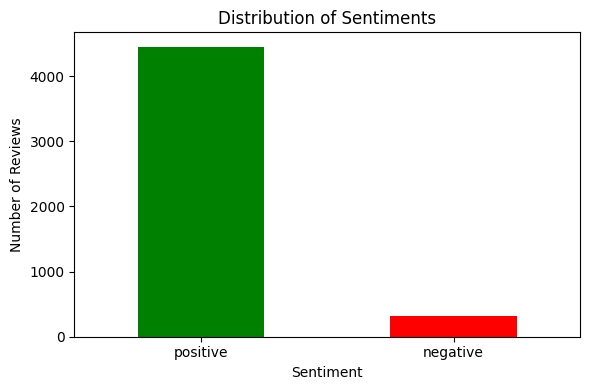

In [17]:
#sentiment distribution bar chart
import matplotlib.pyplot as plt

#count of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()

#plot bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

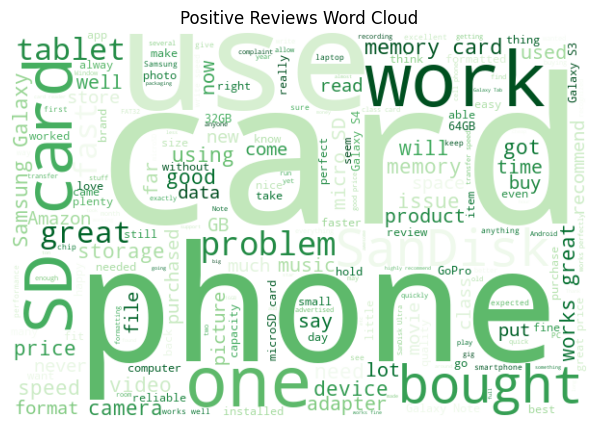

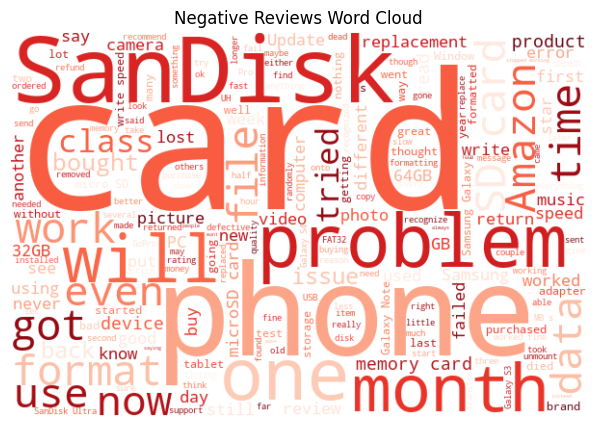

In [16]:
#word clouds for positive & negative reviews
from wordcloud import WordCloud

#positive reviews word cloud
positive_text = ' '.join(df[df['sentiment']=='positive']['reviewText'])
wc_pos = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_text)
plt.figure(figsize=(8,5))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

#negative reviews word cloud
negative_text = ' '.join(df[df['sentiment']=='negative']['reviewText'])
wc_neg = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.figure(figsize=(8,5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

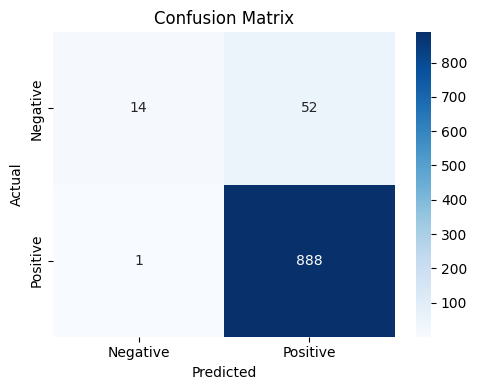

In [15]:
#confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [18]:
#sample predictions table
sample_reviews = ["The product quality is excellent and delivery was fast",
                  "Item arrived broken and packaging was poor",
                  "Very satisfied with the purchase"]

sample_vec = vectorizer.transform(sample_reviews)
predictions = model.predict(sample_vec)

import pandas as pd
pd.DataFrame({"Review": sample_reviews, "Predicted Sentiment": predictions})


,Review,Predicted Sentiment
0,The product quality is excellent and delivery ...,positive
1,Item arrived broken and packaging was poor,positive
2,Very satisfied with the purchase,positive
